# word search

Feb 25 2021


In [33]:
import random
import time
import timeit
import matplotlib.pyplot as plt
import numpy as np

The problem is to take a list of n words, and to search for some given word.

In [23]:
# utility functions

def get_words(n, wordsfile='/usr/share/dict/words'):
    """ Return list of n words """
    # Note that the lines when read in end in newlines; strip() gets rid of that.
    # Ignore words ending in 's or fewer than three letters or Capitalized.
    # Google "python random" for docs on random.sample.
    words = []
    for line in open(wordsfile):
        word = line.strip()
        if word.islower() and word[-2:] != "'s" and len(word) > 2:
            words.append(word)
    return random.sample(words, n)
    
def elapsed_sec(function, toofast=0.05):
    """ Return number of seconds it takes to run a given function. """
    #
    # The approach here is
    #   (a) run it n times and divide by n if it runs too fast to measure,
    #   (b) pick a reasonable value for n by starting small and doubling
    # See also https://docs.python.org/3/library/timeit.html .
    #
    # If you have a function like f(x) and you want to run that with x=10,
    # then pass in lambda:f(10) as the function argument;
    # see https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions
    #
    n = 1
    while True:
        start_time = time.time()              # start timer
        for i in range(n):
            function()
        seconds = time.time() - start_time    # stop timer
        if seconds > toofast:
            return seconds/n
        else:
            n *= 2


In [24]:
# An example of Python's lambda function notation : 
f = lambda x: 2*x+1
f(10)

21

In [25]:
# Examples of get_words() and elapsed_sec() : 
print(f"4 words : {get_words(4)}")
print(f"time to get 100 words : {elapsed_sec(lambda:get_words(100)):.4f} sec.")

4 words : ['haggles', 'inhumanly', 'dins', 'housewares']
time to get 100 words : 0.0548 sec.


In [26]:
# Let's visualize how long that takes for different values of n.
ns = [100, 300, 1000, 3000, 10000, 30000]
secs = [elapsed_sec(lambda:get_words(n)) for n in ns]
print(f"secs = {secs}")

secs = [0.05578768253326416, 0.05309128761291504, 0.05328822135925293, 0.04177653789520264, 0.043974876403808594, 0.07883977890014648]


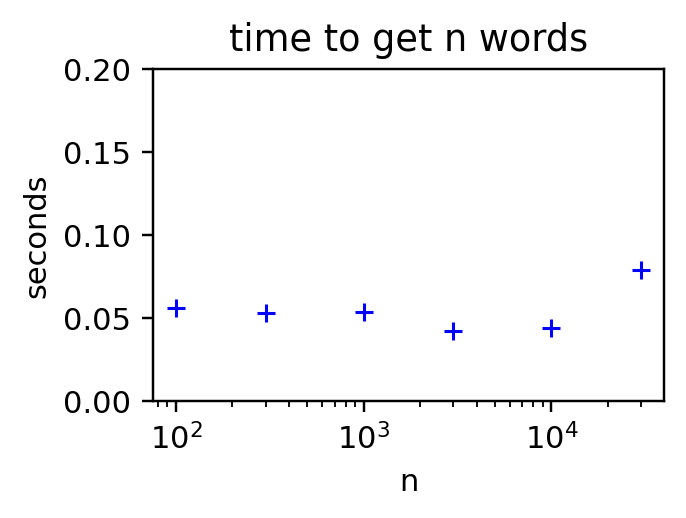

In [27]:
# And now let's make a plot of that.
# Note that some possible plot commands are 
#  (axis.semilogx, axis.semilogy, axis.loglog, axis.plot)
# depending on whether you want a log scale on x, y, both, or neither.

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="seconds", title="time to get n words")
axis.set_ylim((0,0.2))
axis.semilogx(ns, secs, marker="+", color="blue", linestyle="none")
plt.show()


What does that plot tell us?

Well, there isn't any obvious trend here. What's going on is that most of them time is spent in opening up and reading the (large) file, which we're currently doing every time, no matter how many words we want. 

This is O(1), in other words about the same amount of time regardless of n.

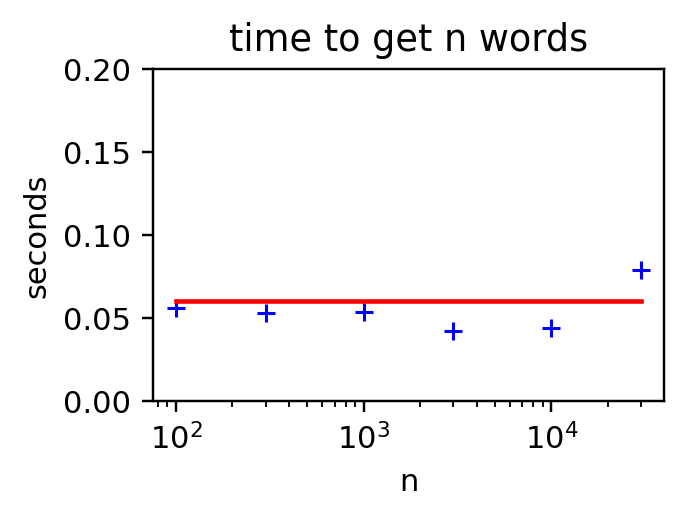

In [28]:
# Here's the same plot with a horizontal line added, showing that this is O(1).
x = np.linspace(ns[0], ns[-1], 100)  # 100 points
y = np.zeros(len(x)) + 0.06          # 100 points, all 0.05 (eyeballing an OK line.)

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="seconds", title="time to get n words")
axis.set_ylim((0,0.2))
axis.semilogx(ns, secs, marker="+", color="blue", linestyle="none")

axis.semilogx(x, y, color='red')  # Here's the added line.

plt.show()

## TODO in class

Python review/reminder :

* keyword arguments
* lambda function
* import
* where to find documentation

## Notebook review/reminder :

* evaluating cells : order matters; "state" of what's been done matters
* keyboard shortcuts
* markdown vs python cells

## How to turn in one of these notebooks as homework :

* File >> Download As >> HTML     (.html)
* File >> Downlaod As >> Notebook (.ipynb)
* "Drag and Drop" both files onto the "attachments" region when editing the work submission page

linear search
---------------

First, write a function which searches a list of n words for a given word,
by starting at i=0, looking at each word[i], and incrementing i.

Then measure how long that takes to run for different values of n.

Discuss : "worst case", "best case", "average case"

Do timing for both (a) can find word, (b) can't find word.

Make a plot of (time, n). 

What O() behavior is this? Why?

binary search
----------------

Second, repeat all of that with a binary search algorithm.

This only words if the list is sorted. For now we'll just sort
the list with Python's built-in stuff, and not look at that time.
If we're given a sorted list, we could use a binary search to 
look things up, for example looking up names in a phone book.

Look up "binary search" and explain the algorithm.

Do timing and make the plot again. What O() behavior is this? Why?

Discuss number of times through loop if n=128, 64, 32, ...

hash table
------------

Third, repeat all of that with a python built-in dictionary.

We won't (for now) discuss how the dictionary works, just plop
all the data into the dictionary initially. Then look up words
and do the timing again. Make a plot. What O() is this?

Then make a plot which all three cases on one graph.

Discuss advantages and disadvanages to each approach.

* How much preparation time does it take?
* How much memory does it take?
* How expensive is it to add more words? Remove words?

--------

** We started here in class **

--------

# linear search : O(n)

First option: look at each word in the list until we find the one we want. Time is proportional to the number of words.

In [89]:
# First we came up with a function to search for a word,
# just looping through all the words.

def search1(word, words):
    """ search for word in a list of words, 
        return index of word or -1 if can't find it."""
    # O(n) "linear" search ; n = len(words)
    # words is something like ['red', 'green', 'blue']
    # word is like 'green'
    for i in range(len(words)):
        if words[i] == word:
            return i
    return -1

# Here are some tests to see if it works.

animals = ['dog', 'cat', 'fox']
assert search1( 'cat', animals) == 1, "search1 finds 'cat'"
assert search1('mouse', animals) == -1, "search1 fails to find 'mouse'"



In [90]:
search1( 'cat', ['dog', 'cat', 'fox'])

1

In [91]:
# Now we find the times it takes to do 
# for different numbers for n, the number of items in the list.
# (I'm using "ns" to mean the plural of "n").

# best case :  O(1)    1 time through loop; boom I'm done.
# worst case : O(n)    doesn't find it
# average case :       perhaps n/2 (half of them looked at), still O(n)

times_search1 = []
for n in ns:
    words = get_words(n)
    f = lambda : search1('cat', words)
    t = elapsed_sec(f)
    times_search1.append(t)

print(times_search1)

[5.92306605540216e-06, 1.7271318938583136e-05, 5.9019774198532104e-05, 0.0002277204766869545, 0.0007982440292835236, 0.003658294677734375]


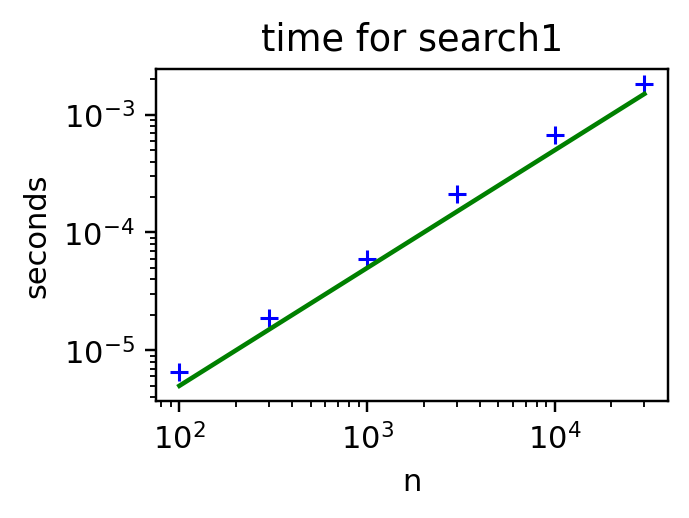

In [44]:
# Let's see a plot ... 

# This is the best fit line;
# I adjusted the constants by eye choosing a few values.

x = np.array(ns)         # numerical python array
y = 0.5 * 10**-7 * x     # apply this formula to each of the elements of x

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="seconds", title="time for search1")
# axis.set_ylim((0,0.2))
axis.loglog(ns, times_search1, marker="+", color="blue", linestyle="none")
axis.loglog(x, y, color='green')
plt.show()


# binary search : O(log n)

If the list of words is already sorted, we can search much faster.

In [50]:
# part 2 : binary search
# "divide-and-conquer"
# O(log n)

# list must be sorted first !

words = animals
words.sort()
words


['cat', 'dog', 'fox']

In [67]:
# assume list of words is sorted
def search2(word, words, maxiterations=1e10):
    # use binary search to find the word
    i_low = 0                  # lowest index where word might be
    i_high = len(words) - 1    # highest index where word might be
    iterations = 0
    while True:
        iterations += 1
        i = (i_low + i_high) // 2   # middle value
        if word == words[i]:
            return i
        if word < words[i]:      # low   HERE    i          high
            i_high = i - 1
        else:
            i_low = i + 1
        # quit when low & high cross
        if i_low > i_high:
            return -1
        if iterations > maxiterations:
            raise Exception("hit max iterations in search2")
            return None # never gets here
    
for target in (10, 20, 49, 50, 81, 91):
    assert search2(target, list(range(100))) == target
assert search2(150, list(range(100))) == -1
    

In [102]:
# best case :  O(1)       # 1 time through loop; boom I'm done.
# worst case : O(log n)   # doesn't find it
# average case :          # still O(log n) in practice; demo with numerical tests

times_search2 = []
for n in ns:
    words = get_words(n)
    words.sort()                          # sort the words - not timing this 
    f = lambda : search2('cat', words)
    t = elapsed_sec(f)
    times_search2.append(t)

print(times_search2)

[1.815358700696379e-06, 2.246146323159337e-06, 3.096647560596466e-06, 3.4562835935503244e-06, 3.896129783242941e-06, 4.5681517804041505e-06]


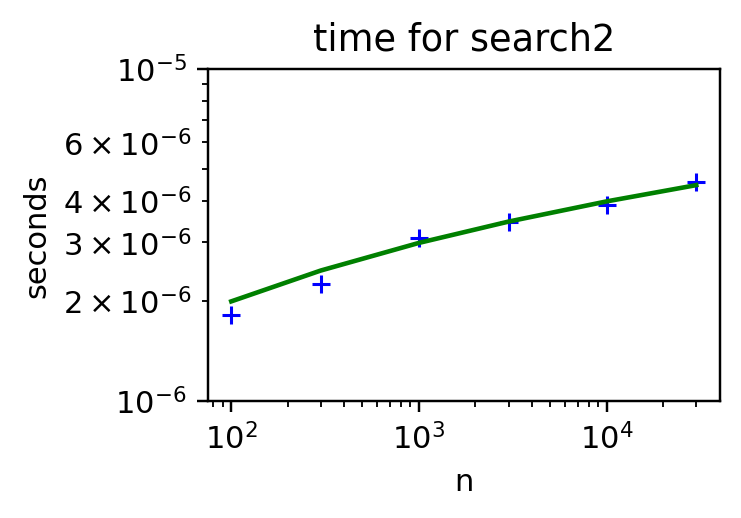

In [103]:
# Let's make another plot for this binary search.

# here's the log2() curve fit (x,y) points,
# again with some constants that I picked by eye.

x = np.array(ns)              # numerical python array
y = 3 * 1e-7 * np.log2(x)     # apply this formula to each of the elements of x

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="seconds", title="time for search2")
axis.set_ylim((1e-6, 1e-5))
axis.loglog(ns, times_search2, marker="+", color="blue", linestyle="none")
axis.loglog(x2, y2, color='green')
plt.show()


In [104]:
# how many times through the loop for thirty thousand words? 15.

np.log2(30000)

14.872674880270605

# Hash Table : O(1)

And finally, if we put the words into a hash table - fairly expensive in terms of memory - we can do the lookup even faster, in essentially the same time regardless of n.

In [80]:
# Third option : use a python dictionary i.e. HASH TABLE

['cat', 'dog', 'fox']

In [81]:
{ key:True for key in animals}   #  comprehension

{'cat': True, 'dog': True, 'fox': True}

In [84]:
def search3(word, words):
    # assume words is a dictionary
    # return the word if it is a key in the dictionary,
    # return False if it isn't.
    return words.get(word, False)


In [87]:
# This will be O(1)
# BUT need more memory to put things into a hash table first.

# best case :  O(1)       # 1 time through loop; boom I'm done.
# worst case : O(1)
# average case O(1)

# ... really fast.

times_search3 = []
for n in ns:
    words = get_words(n)
    words = {w:True for w in words}
    f = lambda : search3('cat', words)
    t = elapsed_sec(f)
    times_search3.append(t)

print(times_search3)

[2.536144165787846e-07, 2.93585799227003e-07, 2.5453209673287347e-07, 2.2899894247530028e-07, 2.2641415853286162e-07, 2.188089638366364e-07]


In [88]:
# All much faster than other, constant time.